# Logistic Regression
## on SUV dataset for predicting the sales
### https://www.kaggle.com/iamaniket/suv-data

In [26]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import math
import scipy

In [2]:
data=pd.read_csv(r"C:\Users\yash gandhi\Desktop\Python\Datasets\suv_data.csv",sep=",")
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


## Analysis data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<AxesSubplot:xlabel='Purchased', ylabel='count'>

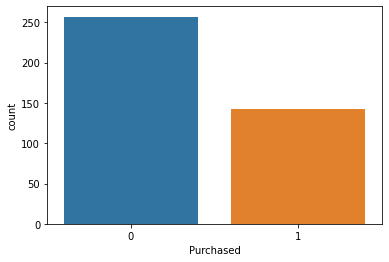

In [4]:
sns.countplot(x="Purchased",data=data)

C:\Users\yash gandhi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Purchased', ylabel='count'>

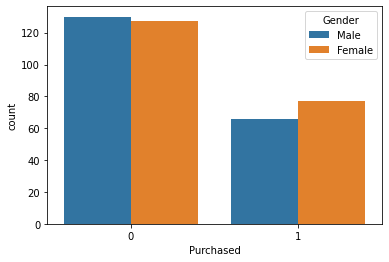

In [5]:
sns.countplot("Purchased",hue="Gender",data=data)

<AxesSubplot:ylabel='Frequency'>

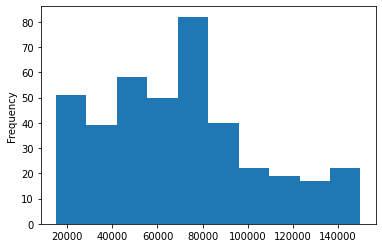

In [6]:
data["EstimatedSalary"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

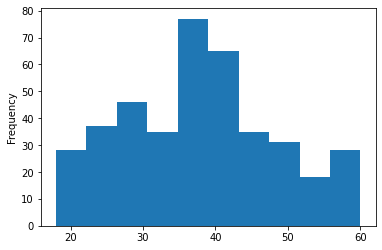

In [7]:
data["Age"].plot.hist()

C:\Users\yash gandhi\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age', ylabel='count'>

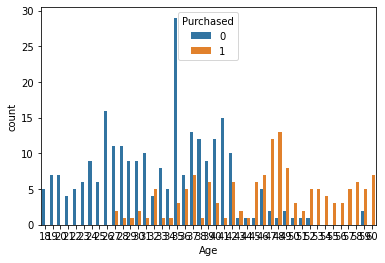

In [8]:
sns.countplot("Age",hue="Purchased",data=data)

<AxesSubplot:xlabel='Age', ylabel='Gender'>

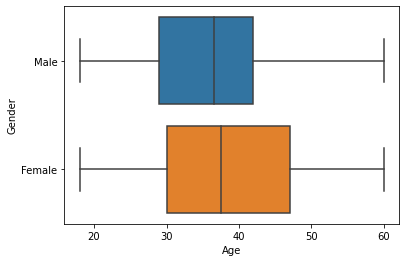

In [9]:
sns.boxplot(x="Age",y="Gender",data=data)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>

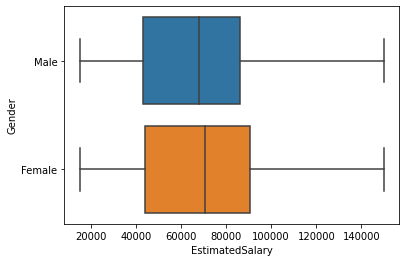

In [10]:
sns.boxplot(x="EstimatedSalary",y="Gender",data=data)

## Data Wrangling
### Cleaning of data

In [11]:
#checking count of null values
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

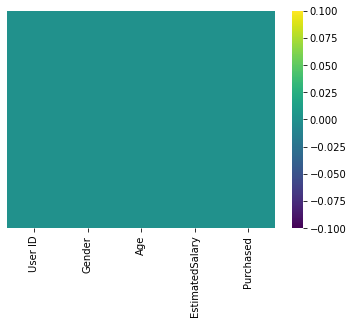

In [12]:
#checking null values visually
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

In [13]:
#dropping unnecessary columns
data.drop("User ID",axis=1,inplace=True)
print(data.head())

   Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0


In [14]:
#binarization of values 
Gender=pd.get_dummies(data["Gender"],drop_first=True)
data.drop(["Gender"],axis=1,inplace=True)
data=pd.concat([data,Gender],axis=1)
print(data.head())

   Age  EstimatedSalary  Purchased  Male
0   19            19000          0     1
1   35            20000          0     1
2   26            43000          0     0
3   27            57000          0     0
4   19            76000          0     1


## Train and test split and prediction using LR


In [21]:
X=data.drop("Purchased",axis=1)
Y=data["Purchased"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.15,random_state=6)

In [31]:
#scaling of data as salaries can effect the output
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [32]:
from sklearn.linear_model import LogisticRegression
logModel=LogisticRegression()
logModel.fit(x_train,y_train)
prediction=logModel.predict(x_test)

## Accuracy check

In [33]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.88      0.97      0.93        39\n           1       0.94      0.76      0.84        21\n\n    accuracy                           0.90        60\n   macro avg       0.91      0.87      0.88        60\nweighted avg       0.90      0.90      0.90        60\n'

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(prediction,y_test)

array([[38,  5],
       [ 1, 16]], dtype=int64)

In [35]:
#printing the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

#WITHOUT FITTING AND SCALING OF DATA, THE ACCURACY WAS 0.66% 

0.9

In [20]:
from 

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
95,35,44000,0,0
96,35,25000,0,0
97,28,123000,1,1
98,35,73000,0,1


In [30]:
from scipy.special import expit
xmin=data["Age"].min(axis=0)
xmax=data["Age"].max(axis=0)